### ADTA 5120 Final Project Logistic Regression
Marissa McKee

This project is based on the data set called ERIMdata.xlsx that includes about 3,000 households in two midwestern cities in the United States. The data contain demographic information such as household incomes, number of household members, education levels of the heads of households as well as information on the purchases of several retail products such as frozen dinners and yogurt. The data were collected between 1985 and 1988 by a marketing research firm, AC Nielsen. 


Your assignment is first to propose a business analytics plan based on the CRISP-DM framework and identify and complete the appropriate tasks for each of the six CRISP-DM phases. The project deliverables include a final written report and an oral presentation that should follow the outline shown below. 

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
# Import ERIMDataClean.csv
file = 'ERIMDataClean.csv'
df = pd.read_csv(file, sep = ',')
df.head()

,HH_ID,ResType,ResStatus,HHInc,HHNbr,MWrkHrs,MEdu,FWrkHrs,FEdu,FBirth,...,ResStatus2,MUndergrad,MGrad,FUndergrad,FGrad,Married,BuyYog,BuyDin,FAge,MAge
0,1100032,3,1,11,2,40,8,40,9,1938,...,0,0,0,1,0,1,1,0,50,53
1,1100107,1,2,3,3,0,0,40,7,1942,...,1,0,0,0,0,1,0,1,46,46
2,1100131,3,1,9,4,40,9,40,8,1949,...,0,1,0,0,0,1,1,1,39,39
3,1100172,1,2,2,1,0,0,0,9,1921,...,1,0,0,1,0,1,1,0,67,67
4,1100180,3,1,8,4,40,9,38,8,1946,...,0,1,0,0,0,1,1,0,42,51


In [32]:
col_names = ['HH_ID', 'ResType', 'ResStatus', 'HHInc', 'HHNbr', 'MWrkHrs', 'MEdu',
       'FWrkHrs', 'FEdu', 'FBirth', 'F_Rel', 'MBirth', 'M_Rel', 'Cable',
       'Cats', 'Dogs', 'YogExp', 'DinExp', 'HHIn1', 'HHIn2', 'HHIn3', 'HHIn4',
       'HHIn5', 'HHIn6', 'HHIn7', 'HHIn8', 'HHIn9', 'HHIn10', 'HHIn11',
       'HHIn12', 'HHIn13', 'ResType1', 'ResType2', 'ResType3', 'ResType4',
       'ResType5', 'ResStatus1', 'ResStatus2', 'MUndergrad', 'MGrad',
       'FUndergrad', 'FGrad', 'Married', 'BuyYog', 'BuyDin', 'FAge', 'MAge']

In [33]:
# Data types come in as objects
df = df.apply(pd.to_numeric) 


# Check data types
df.dtypes

HH_ID           int64
ResType         int64
ResStatus       int64
HHInc           int64
HHNbr           int64
MWrkHrs         int64
MEdu            int64
FWrkHrs         int64
FEdu            int64
FBirth          int64
F_Rel           int64
MBirth          int64
M_Rel           int64
Cable           int64
Cats            int64
Dogs            int64
YogExp        float64
DinExp        float64
HHIn1           int64
HHIn2           int64
HHIn3           int64
HHIn4           int64
HHIn5           int64
HHIn6           int64
HHIn7           int64
HHIn8           int64
HHIn9           int64
HHIn10          int64
HHIn11          int64
HHIn12          int64
HHIn13          int64
ResType1        int64
ResType2        int64
ResType3        int64
ResType4        int64
ResType5        int64
ResStatus1      int64
ResStatus2      int64
MUndergrad      int64
MGrad           int64
FUndergrad      int64
FGrad           int64
Married         int64
BuyYog          int64
BuyDin          int64
FAge      

In [34]:
#split dataset in features and target variable
feature_cols = ['HH_ID', 'ResType', 'ResStatus', 'HHInc', 'HHNbr', 'MWrkHrs', 'MEdu',
       'FWrkHrs', 'FEdu', 'FBirth', 'F_Rel', 'MBirth', 'M_Rel', 'Cable',
       'Cats', 'Dogs', 'YogExp', 'DinExp', 'HHIn1', 'HHIn2', 'HHIn3', 'HHIn4',
       'HHIn5', 'HHIn6', 'HHIn7', 'HHIn8', 'HHIn9', 'HHIn10', 'HHIn11',
       'HHIn12', 'HHIn13', 'ResType1', 'ResType2', 'ResType3', 'ResType4',
       'ResType5', 'ResStatus1', 'ResStatus2', 'MUndergrad', 'MGrad',
       'FUndergrad', 'FGrad', 'Married', 'BuyDin', 'FAge', 'MAge']
X = df[feature_cols] # Features
y = df.BuyYog # Target variable

In [35]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [36]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict the test data
y_pred=logreg.predict(X_test)

C:\Users\mckee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
# Model evaluation using the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0, 168],
       [  0, 630]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

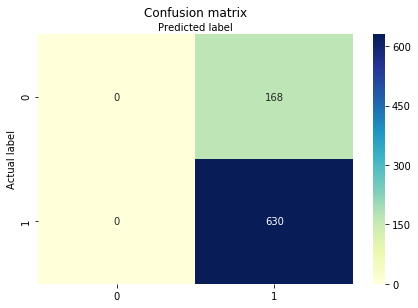

In [42]:
# Visualize the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
# Evaluate the confusion matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7894736842105263
Precision: 0.7894736842105263
Recall: 1.0


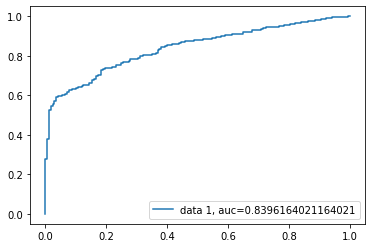

In [45]:
# Receiver Operating Characteristic (ROC) curve to evaluate the AUC score
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()